In [1]:
run tptreesource.py

On peut utiliser la variance comme mesure d'homogénéité

In [2]:
from sklearn import tree

In [39]:
data1 = rand_checkers(n1=114, n2=114, n3=114, n4=114)
x1 = data1[:,:2]
y1 = data1[:,2]

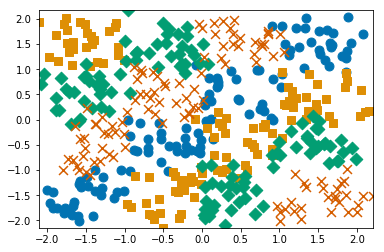

In [40]:
plot_2d(x1,y1)

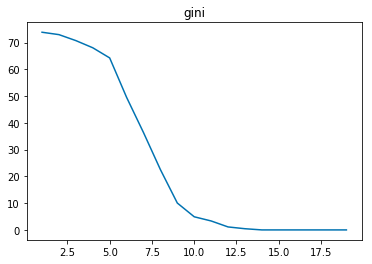

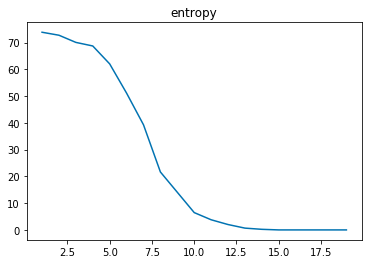

In [7]:
depths = range(1,20)
scores_list = []
for criterion in ['gini', 'entropy']:
    scores = []
    for max_depth in depths:
        tree_ = tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
        tree_.fit(x1,y1)
        scores.append(tree_.score(x1,y1))
    scores_list.append(scores)
    plt.plot(depths, [(1-x)*100 for x in scores])
    plt.title(criterion)
    plt.show()

In [25]:
import pydot
from sklearn.externals.six import StringIO

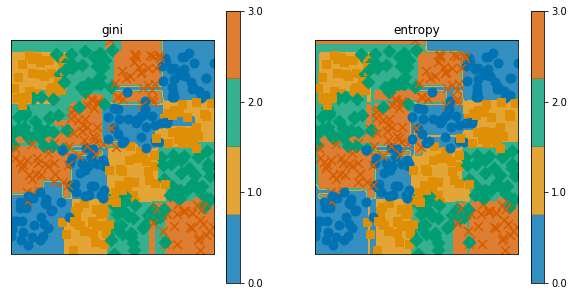

In [27]:
plt.figure(figsize=(10,5))
criterions = ['gini', 'entropy']
for i in range(2):
    optimal_tree = tree.DecisionTreeClassifier(
        criterion=criterions[i], max_depth=scores_list[i].index(max(scores_list[i])))
    optimal_tree.fit(x1, y1)
    plt.subplot(121+i)
    frontiere_new(optimal_tree.predict, x1, y1)
    plt.title(criterions[i])
    dot_data = StringIO()
    tree.export_graphviz(optimal_tree,out_file=dot_data)   
    graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
    graph[0].write_pdf(criterions[i]+".pdf") 
plt.show()

In [36]:
data2 = rand_checkers(n1=40, n2=40, n3=40, n4=40)

In [37]:
x2 = data2[:,:2]

y2 = data2[:,2]

In [42]:
for i in range(2):
    optimal_tree = tree.DecisionTreeClassifier(
        criterion=criterions[i], max_depth=scores_list[i].index(max(scores_list[i])))
    optimal_tree.fit(x1, y1)
    print(criterions[i]+" scores "+str(optimal_tree.score(x2,y2)))

gini scores 0.8625
entropy scores 0.8625


In [44]:
from sklearn import datasets

In [45]:
digits = datasets.load_digits()

In [48]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

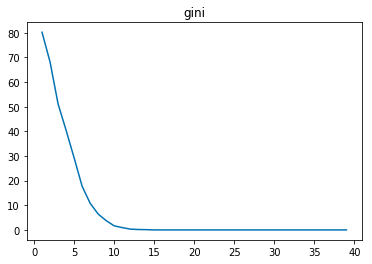

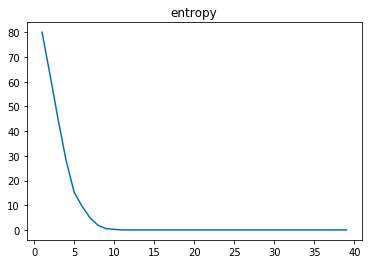

In [50]:
depths = range(1,40)
scores_list = []
for criterion in ['gini', 'entropy']:
    scores = []
    for max_depth in depths:
        tree_ = tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
        tree_.fit(digits.data, digits["target"])
        scores.append(tree_.score(digits.data, digits["target"]))
    scores_list.append(scores)
    plt.plot(depths, [(1-x)*100 for x in scores])
    plt.title(criterion)
    plt.show()